In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [29]:
# Loading the customer data
customer_data = pd.read_csv('Customers.csv')  # Assumes 'Customers.csv' is available

# Loading the transactions data
transactions_data = pd.read_csv('Transactions.csv')  # Assumes 'Transactions.csv' is available

# Checking the first few rows of both datasets to understand the structure
print("Customer Data:")
print(customer_data.head())
print("\nTransactions Data:")
print(transactions_data.head())

Customer Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [31]:
# Aggregating the total purchase value per customer by summing 'TotalValue' from the transactions data
customer_transactions = transactions_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Merging the customer data with the aggregated total purchase data
customer_data = customer_data.merge(customer_transactions[['CustomerID', 'TotalValue']], on='CustomerID', how='left')

# Verifying the merged data
print("\nMerged Customer Data:")
print(customer_data.head())

# Selecting relevant features for clustering (e.g., TotalValue for simplicity)
features = ['TotalValue']  # You can expand this with other features if available

# Extracting the selected features from the customer data
X = customer_data[features]

# Handling missing data by filling with the mean (or using another strategy)
X.fillna(X.mean(), inplace=True)

# Standardizing the data (scaling it) to bring all features to the same scale before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verifying the scaled data
print("\nScaled Data:")
print(X_scaled[:5])



Merged Customer Data:
  CustomerID        CustomerName         Region  SignupDate  TotalValue
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74
2      C0003      Michael Rivera  South America  2024-03-07     2725.38
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88
4      C0005         Laura Weber           Asia  2022-08-15     2034.24

Scaled Data:
[[-0.06185626]
 [-0.87994615]
 [-0.40687569]
 [ 1.03513813]
 [-0.78589581]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19176\1004617464.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [33]:
# Setting the number of clusters (you can try different values from 2 to 10 clusters)
n_clusters = 4  # Adjust as needed

# Initializing the Gaussian Mixture Model with the chosen number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fitting the GMM to the scaled data
customer_data['Cluster'] = gmm.fit_predict(X_scaled)

# Verifying the clustering results
print("\nClustering Results:")
print(customer_data[['CustomerID', 'Cluster']].head())



Clustering Results:
  CustomerID  Cluster
0      C0001        1
1      C0002        1
2      C0003        1
3      C0004        3
4      C0005        1


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Calculating the Davies-Bouldin Index (DB Index) for cluster evaluation
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])

# Output the Davies-Bouldin Index
print(f"\nDavies-Bouldin Index: {db_index:.4f}")



Davies-Bouldin Index: 0.5236


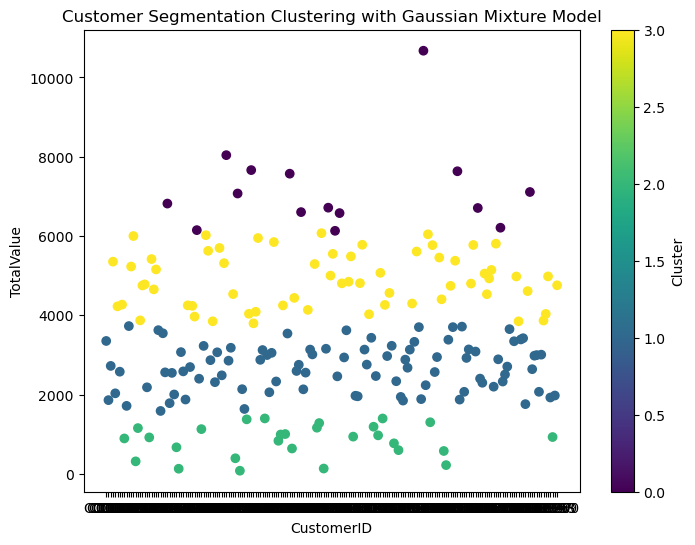

In [37]:
# Visualizing the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['CustomerID'], customer_data['TotalValue'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('CustomerID')
plt.ylabel('TotalValue')
plt.title('Customer Segmentation Clustering with Gaussian Mixture Model')
plt.colorbar(label='Cluster')
plt.show()
